In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Datasets de sklearn

In [5]:
from sklearn import datasets

## Toy datasets

In [6]:
iris = datasets.load_iris()

In [7]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## Real life datasets

In [8]:
olivetti = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/nicolas/scikit_learn_data


In [16]:
olivetti.images.shape

(400, 64, 64)

In [19]:
plt.imshow?

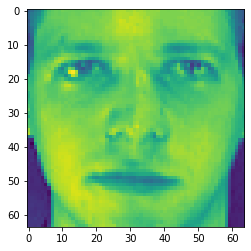

In [22]:
plt.imshow(olivetti.images[0])
plt.show()

## Datasets generados

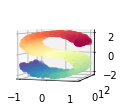

In [33]:
n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
# Create figure
fig = plt.figure(figsize=(10, 10))


# Add 3d scatter plot
ax = fig.add_subplot(251, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)


## Generador propio

In [137]:
def genData(clusters, samples, features):
    data = []
    samplesPerClass = samples // clusters 
    
    # genera centroides reales
    centroids = np.random.normal(loc=0, scale=5,size=(clusters,features))
    # Vectores de ruido
    noise = np.random.normal(0,2,size=(samples//clusters,features))
    # Muestras con ruido c/ centroides aleatorios
    data = np.reshape((centroids[:,None] + noise), (samples,features))
    
    return data, centroids

# K-means

K-means es uno de los algoritmos más básicos en Machine Learning no supervisado. Es un algoritmo de
clusterización, que agrupa los datos que comparten características similares. Recordemos que entendemos
datos como n realizaciones del vector aleatorio X.
El algoritmo K-means funciona de la siguiente manera:
1. El usuario selecciona la cantidad de clusters a crear (n).
2. Se seleccionan n elementos aleatorios de X como posiciones iniciales del los centroides C.
3. Se calcula la distancia entre todos los puntos en X y todos los puntos en C.
4. Para cada punto en X se selecciona el centroide más cercano de C.
5. Se recalculan los centroides C a partir de usar las filas de X que pertenecen a cada centroide.
6. Se itera entre 3 y 5 una cantidad fija de veces o hasta que la posición de los centroides no cambie.

![kmeans-gif](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/617px-K-means_convergence.gif?20170530143526 "kmean")

In [142]:
def kmeans(clusters, data, iterations):
    classification = np.zeros(len(data))
    indexes = np.array([x for x in range(0,len(data),1)]) # Lista con los indices de los datos
    centroids = data[np.random.choice(indexes, size=(clusters), replace=False)] # Inicializa centroides
    centroids = centroids[:, None] # Agrega dimensión para broadcasting

    for i in range(iterations): # Cantidad de iteraciones
        # Calcular la distancia de cada vector a cada centroide
        distances = np.sqrt(np.sum((data - centroids)**2,axis=2))
        classification = np.argmin(distances, axis=0)
        for c in range(clusters): # Se actualizan los centroides uno a uno
            centroids[c] = np.mean(data[classification == c,:], axis=0)
            
    # Última actualización de clases con centroides finales
    distances = np.sqrt(np.sum((data - centroids)**2,axis=2))
    classification = np.argmin(distances, axis=0)
    centroids = np.reshape(centroids, (clusters, data.shape[1]))
    
    return classification, centroids


In [146]:
d, trueCentr = genData(clusters=4,samples=400,features=3)

In [147]:
classif, centr = kmeans(clusters=4,data=d,iterations=100)

(4, 400)
[[14.39938523 13.32822103 17.55856741 ... 12.35774697 12.69315296
  12.53220972]
 [ 8.55051426  6.516731   10.38917767 ...  4.37305435  2.59778232
   5.0941044 ]
 [10.38783181  9.20251399 13.69278299 ...  7.91692742  8.52550778
   7.67609069]
 [ 1.33721207  2.18660916  4.68961142 ... 10.3971153  10.02803789
   3.43716281]]
////
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 1 2 2 2 2 1 0 1 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 2 2 1 2 2 0 2 2 2 1 2 2 0 1 1 2 2 1 2 2 0
 1 2 2 0 2 1 2 2 2 2 2 2 2 0 2 2 2 2 2 0 0 2 0 2 2 2 0 0 0 2 2 2 1 1 2 2 2
 2 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 